# Project 2 Part 4
Susan Shin

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pymysql
pymysql.install_as_MySQLdb()

from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists
from urllib.parse import quote_plus as urlquote

from scipy import stats

In [325]:
data2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')

In [326]:
data2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [327]:
# concatenating df1 and df2 along rows
df = pd.concat([data2000, data2001], axis=0)
 
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.108,2057.0,PG


In [328]:
df = df.drop(labels=0, axis=0)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 1 to 1292
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2506 non-null   object 
 1   adult                  2506 non-null   float64
 2   backdrop_path          1324 non-null   object 
 3   belongs_to_collection  198 non-null    object 
 4   budget                 2506 non-null   float64
 5   genres                 2506 non-null   object 
 6   homepage               173 non-null    object 
 7   id                     2506 non-null   float64
 8   original_language      2506 non-null   object 
 9   original_title         2506 non-null   object 
 10  overview               2454 non-null   object 
 11  popularity             2506 non-null   float64
 12  poster_path            2231 non-null   object 
 13  production_companies   2506 non-null   object 
 14  production_countries   2506 non-null   object 
 15  rele

In [330]:
df['genres'].value_counts()

[{'id': 18, 'name': 'Drama'}]                                                                                                 351
[]                                                                                                                            286
[{'id': 35, 'name': 'Comedy'}]                                                                                                163
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                99
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]                                                                    76
                                                                                                                             ... 
[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]      1
[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'name': 'War'}, {'id': 14, 'name': 'Fantasy'}]

In [331]:
df['genres'] = df['genres'].astype(str)

In [332]:
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [333]:
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,genres_list
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN,Comedy
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN,Music
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN,Romance
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN,Science Fiction
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,tt7797670,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,...,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,0.0,0.0,0.0,NaN,Horror
1289,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.0,0.0,NaN,Horror
1290,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.0,0.0,NaN,Western
1291,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.0,0.0,NR,Horror


In [334]:
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [335]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex =False)
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,False,False,False,False,False,False,False,False,False,False
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,False,False,False,False,False,False,False,False,False,False
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,False,False,False,False,False,False,False,False,False,False
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,False,False,False,False,False,False,False,False,False,False
5,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,tt7797670,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,...,False,True,False,False,False,False,False,False,False,False
1289,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,False,True,False,False,False,False,False,False,False,False
1290,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,False,False,False,False,False,False,True,False,False,False
1291,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,False,True,False,False,False,False,False,False,False,False


In [336]:
## Drop original genre cols
df  = df.drop(columns=['genres','genres_list'])
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,homepage,id,original_language,original_title,overview,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,False,False,False,False,False,False,False,False,False,False
2,tt0113092,0.0,NaN,NaN,0.0,NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,...,False,False,False,False,False,False,False,False,False,False
3,tt0116391,0.0,NaN,NaN,0.0,NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",...,False,False,False,False,False,False,False,False,False,False
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,NaN,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",...,False,False,False,False,False,False,False,False,False,False
5,tt0118852,0.0,NaN,NaN,0.0,NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,tt7797670,0.0,NaN,NaN,0.0,NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,Underground French necrophilia nastiness,...,False,True,False,False,False,False,False,False,False,False
1289,tt7797790,0.0,NaN,NaN,0.0,NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,Underground French necrophilia nastiness,...,False,True,False,False,False,False,False,False,False,False
1290,tt8665056,0.0,NaN,NaN,0.0,http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,In the 1880's a ruthess gang of outlaws terroi...,...,False,False,False,False,False,False,True,False,False,False
1291,tt8795764,0.0,NaN,NaN,0.0,https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,Derek gets sucked into a gothic cult that turn...,...,False,True,False,False,False,False,False,False,False,False


# Hypothesis

Does the rating of a movie affect the revenue?

* Null hypothesis would be that rating doesn't have a signification affect on revenue.
* Alternative hypothesis would be that movie rating has a significant affect on revenue.
* Data is numeric with multiple samples

* Test will be ANOVA

In [337]:
## Checking Certification values
df['certification'].value_counts(dropna=False)

NaN        1709
R           453
PG-13       182
NR           67
PG           63
G            24
NC-17         6
Unrated       1
-             1
Name: certification, dtype: int64

In [338]:
df['certification'] = df['certification'].str.strip()
df['certification'].value_counts(dropna=False)

NaN        1709
R           453
PG-13       182
NR           67
PG           63
G            24
NC-17         6
Unrated       1
-             1
Name: certification, dtype: int64

In [339]:
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      1709
R         453
PG-13     182
NR         69
PG         63
G          24
NC-17       6
Name: certification, dtype: int64

In [340]:
df.drop(df.loc[df['revenue']==0].index, inplace=True)

In [341]:
df.dropna(subset=['certification'], inplace=True)

In [342]:
df['revenue'] = df['revenue'].astype(float)

In [343]:
needed_cols = ['certification', 'revenue']
df[needed_cols].head()

,certification,revenue
11,R,14904.0
19,PG,36754634.0
22,PG,36609995.0
25,R,327418.0
32,R,161834276.0


In [344]:
df['certification'].value_counts()

R        49
PG-13    30
PG       10
G         3
NR        2
Name: certification, dtype: int64

In [373]:
r = df.loc[df['certification'] == 'R', needed_cols]
r.head()

,certification,revenue
11,R,14904.0
25,R,327418.0
32,R,161834276.0
35,R,14828081.0
53,R,15843608.0


In [374]:
pg13 = df.loc[df['certification'] == 'PG-13', needed_cols]
pg13.head()

,certification,revenue
45,PG-13,127666415.0
50,PG-13,123307945.0
76,PG-13,24362772.0
89,PG-13,264105545.0
137,PG-13,14400327.0


In [375]:
nr = df.loc[df['certification'] == 'NR', needed_cols]
nr.head()

,certification,revenue
80,NR,46352.0
119,NR,9200.0


In [376]:
pg = df.loc[df['certification'] == 'PG', needed_cols]
pg.head()

,certification,revenue
19,PG,36754634.0
22,PG,36609995.0
83,PG,59468275.0
222,PG,62464731.0
55,PG,8100000.0


In [377]:
g = df.loc[df['certification'] == 'G', needed_cols]
g.head()

,certification,revenue
274,G,27965865.0
383,G,19748009.0
687,G,18634654.0


# Assumption Testing

## Outliers Testing

In [350]:
r_group = r['revenue']
pg13_group = pg13['revenue']
nr_group = nr['revenue']
pg_group = pg['revenue']
g_group = g['revenue']

In [352]:
r_outliers = np.abs(stats.zscore(r_group))>3
r_outliers.value_counts()

False    48
True      1
Name: revenue, dtype: int64

In [353]:
pg13_group_outliers = np.abs(stats.zscore(pg13_group))>3
pg13_group_outliers.value_counts()

False    30
Name: revenue, dtype: int64

In [354]:
nr_group_outliers = np.abs(stats.zscore(nr_group))>3
nr_group_outliers.value_counts()

False    2
Name: revenue, dtype: int64

In [355]:
pg_group_outliers = np.abs(stats.zscore(pg_group))>3
pg_group_outliers.value_counts()

False    10
Name: revenue, dtype: int64

In [356]:
g_group_outliers = np.abs(stats.zscore(g_group))>3
g_group_outliers.value_counts()

False    3
Name: revenue, dtype: int64

In [360]:
# remove outliers from r group
r_group = r_group[(np.abs(stats.zscore(r_group)) < 3)]

In [362]:
r_group.info()

<class 'pandas.core.series.Series'>
Int64Index: 48 entries, 11 to 878
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


## Normailty Testing

In [364]:
stats.normaltest(r_group)

NormaltestResult(statistic=23.368340474913005, pvalue=8.426152991857613e-06)

In [365]:
stats.normaltest(pg13_group)

NormaltestResult(statistic=10.975684443033131, pvalue=0.004136760764150885)

In [366]:
stats.normaltest(nr_group)

ValueError: skewtest is not valid with less than 8 samples; 2 samples were given.

In [367]:
stats.normaltest(pg_group)

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=13.017323818819492, pvalue=0.0014904727769165676)

In [368]:
stats.normaltest(g_group)

ValueError: skewtest is not valid with less than 8 samples; 3 samples were given.

## Equal Variance Testing

In [369]:
results = stats.levene(r_group, pg13_group, nr_group, pg_group, g_group )
results

LeveneResult(statistic=3.729301121845133, pvalue=0.007510642151799008)

## Final Hyopthesis Testing

In [370]:
stats.f_oneway(r_group, pg13_group, nr_group, pg_group, g_group )

F_onewayResult(statistic=4.657595167691759, pvalue=0.0018594201265665377)

p value is X and is less/more than alpha



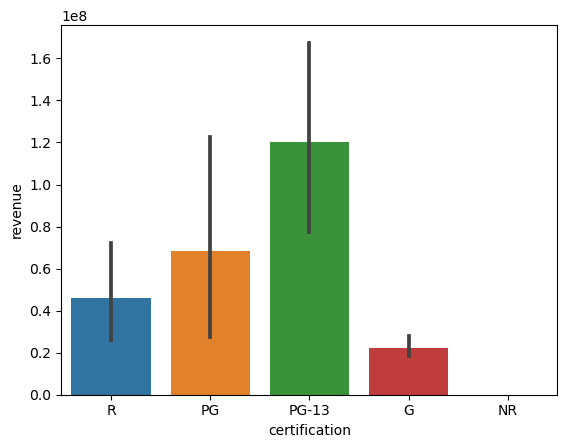

In [372]:
sns.barplot(data = df, x = "certification", y = "revenue");